# PD6
Krzysztof Wolny  
01.06.2021 r.

In [1]:
from numpy.random import RandomState
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
from time import time

from sklearn.datasets import fetch_olivetti_faces

In [2]:
# Wczytujemy dane: 
n_row, n_col = 2, 3
n_components = n_row * n_col
rng = RandomState(0)
image_shape = (64, 64)

In [3]:
X_faces, y = fetch_olivetti_faces(return_X_y=True, shuffle=True,
                                random_state=rng)

In [4]:
def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

## PCA

In [5]:
#Train Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_faces, y, test_size=0.20, random_state=rng)

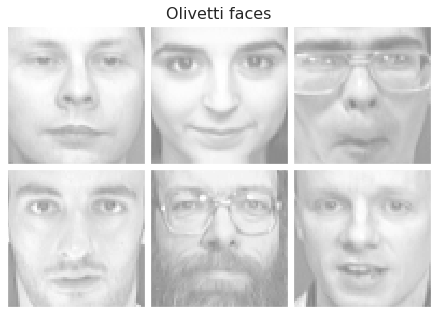

In [6]:
# Wyswietlamy zdjęcia: 
plot_gallery("Olivetti faces", X_train[:n_components])

In [7]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)

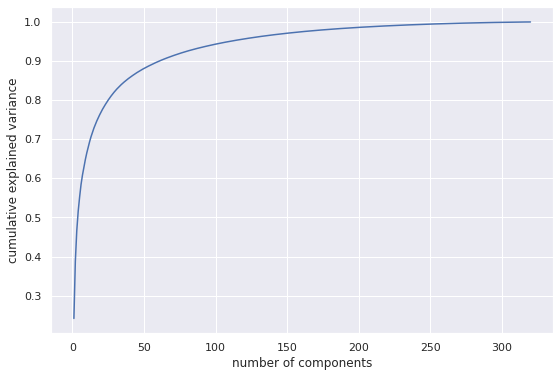

In [8]:
plt.figure(figsize=(9,6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

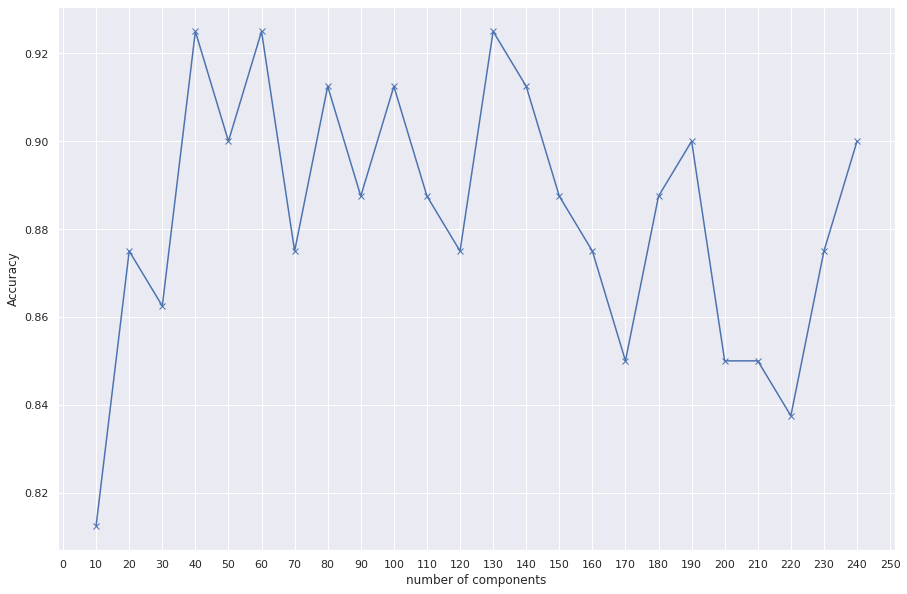

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(random_state=0)
comp_acc_pairs = []
for i in range(10,250, 10):
    pca = PCA(n_components=i)
    y_hat = model.fit(pca.fit_transform(X_train),y_train).predict(pca.transform(X_test))
    comp_acc_pairs.append((i, accuracy_score(y_test, y_hat)))


plt.figure(figsize=(15,10))
plt.plot(*list(zip(*comp_acc_pairs)),'bx-')
plt.xticks(np.arange(0, 250+1, 10.0))
plt.xlabel('number of components')
plt.ylabel('Accuracy');



Weźmy 130 komponetnów

In [10]:
pca = PCA(n_components=190)
X_transformed = pca.fit_transform(X_train)

In [11]:
pca.explained_variance_ratio_

array([2.4167365e-01, 1.4566025e-01, 7.8541957e-02, 5.0057121e-02,
       3.6645930e-02, 3.2123063e-02, 2.4055893e-02, 2.0255512e-02,
       1.9151311e-02, 1.6889056e-02, 1.4861219e-02, 1.4290976e-02,
       1.2688898e-02, 1.1254437e-02, 1.0561993e-02, 9.0989508e-03,
       9.0379156e-03, 8.0920476e-03, 7.6455316e-03, 7.2868764e-03,
       6.8547395e-03, 6.2857359e-03, 6.0473634e-03, 5.8647003e-03,
       5.5100019e-03, 5.2773640e-03, 4.9992814e-03, 4.7868704e-03,
       4.5401878e-03, 4.3852497e-03, 4.0262584e-03, 3.7729850e-03,
       3.7238691e-03, 3.5755530e-03, 3.4049558e-03, 3.1573158e-03,
       3.0931323e-03, 2.9698068e-03, 2.8906798e-03, 2.7651337e-03,
       2.6133021e-03, 2.5717409e-03, 2.5266041e-03, 2.4814068e-03,
       2.3808004e-03, 2.2507079e-03, 2.2331979e-03, 2.1961390e-03,
       2.1080121e-03, 2.0069960e-03, 1.9518634e-03, 1.9289050e-03,
       1.8735843e-03, 1.8256021e-03, 1.7814377e-03, 1.7776450e-03,
       1.7301933e-03, 1.7048852e-03, 1.6747433e-03, 1.6236088e

In [12]:
# Stopień kompresji: 
print(f"Stopień kompresji:{X_train.shape[1]/X_transformed.shape[1]}")

Stopień kompresji:21.557894736842105


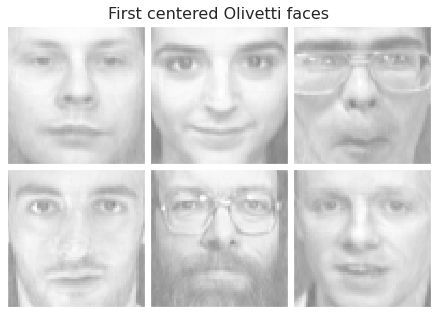

In [13]:
X_inverse = pca.inverse_transform(X_transformed)
plot_gallery("First centered Olivetti faces", X_inverse[:n_components])

Zdjęcia w porównaniu z oryginalnymi wyglądaja naprawde dobrze. Obliczmy jeszcze średnie RMSE:

In [14]:
from sklearn.metrics import mean_squared_error
print(f"Mean RMSE: {mean_squared_error(X_inverse, X_train, squared=False)}")

Mean RMSE: 0.01722082681953907


In [15]:
from matplotlib.image import imsave
from PIL import Image

def save_pics(images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    for i, comp in enumerate(images):
        vmax = max(comp.max(), -comp.min())
        imsave(f"pic{i}.png", comp.reshape(image_shape), cmap=cmap,
                   vmin=-vmax, vmax=vmax)

In [16]:
#save_pics(X_test[:n_components])

In [21]:
from skimage import io

X_read = []
for i in range(6):

    image = io.imread(f"pic{i}.png", as_gray=True)
    #image = image.ravel()
    X_read.append(image)
X_read = np.array(X_read)
X_read = X_read.reshape(len(X_read), -1)

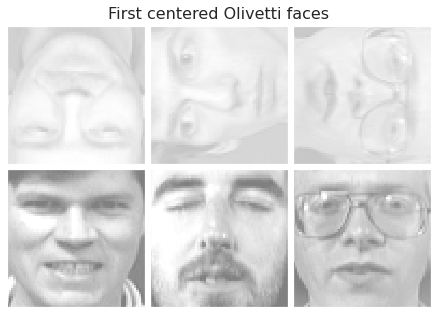

In [22]:
plot_gallery("First centered Olivetti faces", X_read[:n_components])

Zdjęcia 1, 2 ,3 zostały obrócone na wiele sposobów, zdjęcia 3 i 4 zostały uwydatnione, natomiast zdjęcie 6 zostało przyciemnione. 

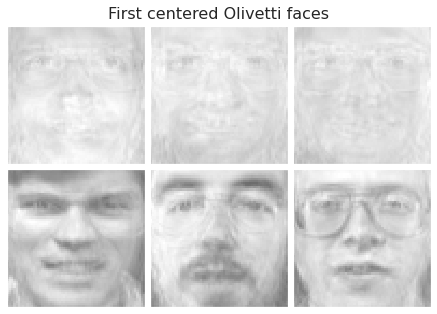

In [23]:
X_read_transformed = pca.transform(X_read)
X_read_inverse = pca.inverse_transform(X_read_transformed)
plot_gallery("First centered Olivetti faces", X_read_inverse[:n_components])

In [27]:
for i in range(6):
    print(f"Zdjęcie {i+1}: {mean_squared_error(X_read_inverse[i], X_test[i], squared=False)}")

Zdjęcie 1: 0.3487807558764505
Zdjęcie 2: 0.3482321724030685
Zdjęcie 3: 0.2999091650041965
Zdjęcie 4: 0.1402176217120748
Zdjęcie 5: 0.11196740388855965
Zdjęcie 6: 0.0784248428193669


Wyniki zdjęć są zdecydowanie gorsze od poprzednio otrzymanych. Jest tak ze względu na przekształcenia dokonanych zdjęć oraz ponownego zapisywania i wczytywania danych. Najlepsze wyniki RMSE otrzymało przyciemnienie, a następnie uwydatnienie. Najgorzej poszło obrotom. 